In [5]:
import pandas as pd
import quandl

In [17]:
df=quandl.get("WIKI/GOOGL")

In [18]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [19]:
df = df[["Adj. Open","Adj. High","Adj. Low","Adj. Close","Adj. Volume"]]

In [20]:
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [21]:
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

In [22]:
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [23]:
df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0
2004-08-20,54.322689,7.921706,7.227007,22834300.0
2004-08-23,54.869377,4.049360,-1.227880,18256100.0
2004-08-24,52.597363,7.657099,-5.726357,15247300.0
2004-08-25,53.164113,3.886792,1.183658,9188600.0


In [27]:
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
import numpy as np
import math

In [28]:
forecast_col = 'Adj. Close'
df.fillna(value=-99999, inplace=True)
forecast_out = int(math.ceil(0.01 * len(df)))

In [29]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [30]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.399229
2004-08-20,54.322689,7.921706,7.227007,22834300.0,68.752232
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,69.639972
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,69.078238
2004-08-25,53.164113,3.886792,1.183658,9188600.0,67.839414


In [36]:
df.dropna(inplace=True)
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2017-01-03,807.57,1.801082,0.868077,1948199.0,846.55
2017-01-04,807.77,1.153794,-0.261764,1495919.0,849.27
2017-01-05,813.02,0.961846,0.683591,1318301.0,851.36
2017-01-06,825.21,2.115825,1.254003,1983025.0,851.00
2017-01-09,827.18,1.065064,0.098019,1405091.0,847.81


In [39]:
X = np.array(df.drop(['label'], 1))
y = np.array(df['label'])

In [40]:
X = preprocessing.scale(X)


/home/niraj/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [41]:
y = np.array(df['label'])


In [43]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size=0.2)

In [44]:
clf = svm.SVR()

In [45]:
clf.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [46]:
confidence = clf.score(X_test, y_test)

In [47]:
confidence

0.81183952987266672

In [48]:
clf=LinearRegression()


In [49]:
clf.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
confidence = clf.score(X_test, y_test)

In [51]:
confidence

0.96977987434741353

In [52]:
clf = LinearRegression(n_jobs=-1)


In [53]:
clf.fit(X_train,y_train)
confidence = clf.score(X_test, y_test)
confidence

0.96977987434741353

In [54]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)

linear 0.968776675877
poly 0.718433003852
rbf 0.811839529873
sigmoid -0.190156297529


In [55]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.399229
2004-08-20,54.322689,7.921706,7.227007,22834300.0,68.752232
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,69.639972
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,69.078238
2004-08-25,53.164113,3.886792,1.183658,9188600.0,67.839414


In [72]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.399229
2004-08-20,54.322689,7.921706,7.227007,22834300.0,68.752232
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,69.639972
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,69.078238
2004-08-25,53.164113,3.886792,1.183658,9188600.0,67.839414


In [73]:
clf

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [94]:
X = np.array(df.drop(['label'], 1))
X = preprocessing.scale(X)

/home/niraj/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:167: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [95]:
y = np.array(df['label'])

In [96]:
len(X),len(y)

(3120, 3120)

In [97]:
X_lately=X[-forecast_out:]

In [98]:
len(X),len(X_lately)

(3120, 32)

In [99]:
df.dropna(inplace=True)


In [100]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.970870600375


In [103]:
forecast_set = clf.predict(X_lately)


In [102]:
print(forecast_set, confidence, forecast_out)


[ 793.77414376  786.89436343  789.99675938  792.76110762  798.03789297
  783.13337233  770.59936774  773.05564154  786.59432866  784.63272798
  798.99603599  803.72590054  817.78958994  816.94436362  823.48988255
  826.25610256  824.0831759   817.98207475  821.03064118  824.49598522
  820.77008275  819.09798901  817.24345614  818.60076835  813.19996695
  812.03022344  800.58245244  815.54525811  816.51443227  822.03021091
  832.76530309  835.94887626] 0.970870600375 32


In [104]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

In [105]:
style.use('ggplot')

In [106]:
df['Forecast'] = np.nan

In [108]:
last_date = df.iloc[-1].name
last_date


Timestamp('2017-01-09 00:00:00')

In [109]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2017-01-03,807.57,1.801082,0.868077,1948199.0,846.55,NaN
2017-01-04,807.77,1.153794,-0.261764,1495919.0,849.27,NaN
2017-01-05,813.02,0.961846,0.683591,1318301.0,851.36,NaN
2017-01-06,825.21,2.115825,1.254003,1983025.0,851.00,NaN
2017-01-09,827.18,1.065064,0.098019,1405091.0,847.81,NaN


In [110]:
last_unix = last_date.timestamp()

In [111]:
last_unix

1483900200.0

In [112]:
one_day = 86400
next_unix = last_unix + one_day

In [113]:
next_unix

1483986600.0

In [114]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [115]:
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
2004-08-19,50.322842,8.072956,0.324968,44659000.0,69.399229,NaN
2004-08-20,54.322689,7.921706,7.227007,22834300.0,68.752232,NaN
2004-08-23,54.869377,4.049360,-1.227880,18256100.0,69.639972,NaN
2004-08-24,52.597363,7.657099,-5.726357,15247300.0,69.078238,NaN
2004-08-25,53.164113,3.886792,1.183658,9188600.0,67.839414,NaN


In [116]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
2017-02-06,NaN,NaN,NaN,NaN,NaN,815.545258
2017-02-07,NaN,NaN,NaN,NaN,NaN,816.514432
2017-02-08,NaN,NaN,NaN,NaN,NaN,822.030211
2017-02-09,NaN,NaN,NaN,NaN,NaN,832.765303
2017-02-10,NaN,NaN,NaN,NaN,NaN,835.948876


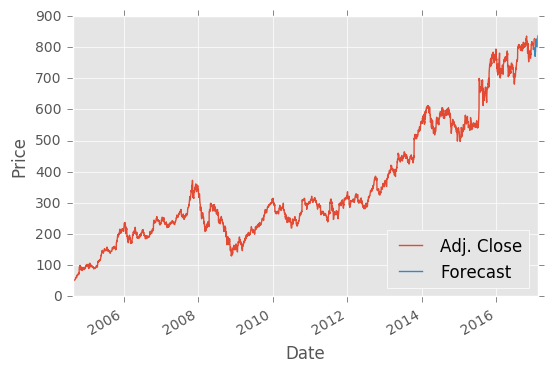

In [123]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [124]:
import pickle

In [125]:
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)

In [126]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

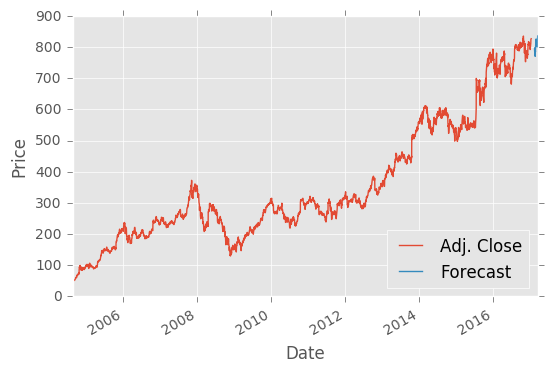

In [127]:
forecast_set = clf.predict(X_lately)
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()